#  ============Diabetes_Prdection_Analysis============

# Importing library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


#  1. Data Preparation

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
diabetes = pd.read_csv('diabetes.csv',names=col_names)
print(diabetes.columns)
diabetes.describe().to_csv('describe.csv')

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'outcome'],
      dtype='object')


# 2 -  Data Exploration

In [4]:
diabetes.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [5]:
print(" Dimension of diabetes data set : {}".format(diabetes.shape))

 Dimension of diabetes data set : (769, 9)


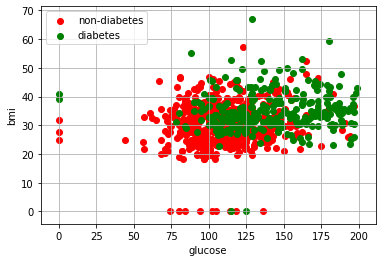

In [5]:
diabetic_negtive=diabetes[diabetes.outcome == 0]
diabetic_positive=diabetes[diabetes.outcome == 1]
plt.scatter(diabetic_negtive['glucose'],diabetic_negtive['bmi'],color='r')
plt.scatter(diabetic_positive['glucose'],diabetic_positive['bmi'],color='g')
plt.xlabel("glucose")
plt.ylabel("bmi")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('bmi_glucose.png')


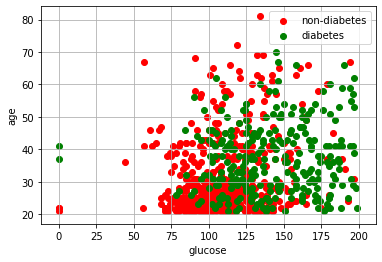

In [6]:
plt.scatter(diabetic_negtive['glucose'],diabetic_negtive['age'],color='r')
plt.scatter(diabetic_positive['glucose'],diabetic_positive['age'],color='g')
plt.xlabel("glucose")
plt.ylabel("age")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('glucose_age.png')

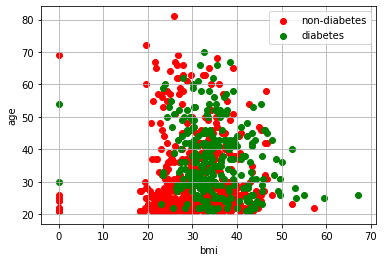

In [7]:
plt.scatter(diabetic_negtive['bmi'],diabetic_negtive['age'],color='r')
plt.scatter(diabetic_positive['bmi'],diabetic_positive['age'],color='g')
plt.xlabel("bmi")
plt.ylabel("age")
plt.legend(('non-diabetes','diabetes'))
plt.grid()
plt.savefig('age_bmi.png')

In [8]:
diabetes.groupby('outcome').size()

outcome
0    500
1    268
dtype: int64

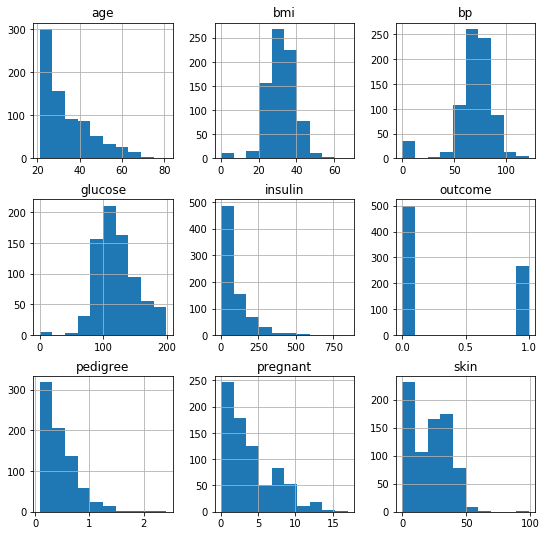

In [9]:
x=diabetes.hist(figsize=(9, 9))

outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

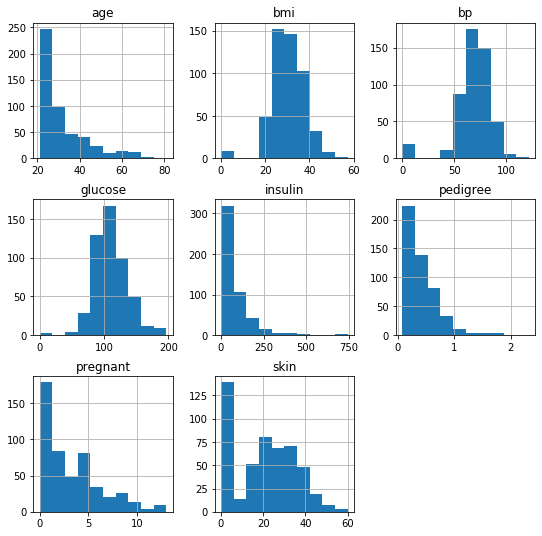

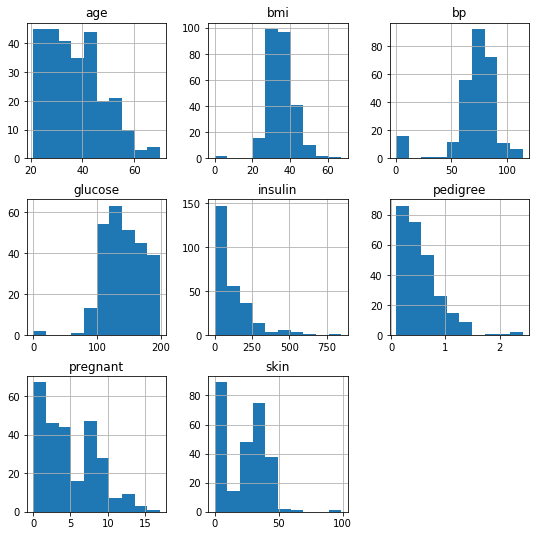

In [10]:
diabetes.groupby('outcome').hist(figsize=(9, 9))

# 3 - Data Cleaning


### a) Missing or Null Data points

In [11]:
diabetes.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64

In [12]:
diabetes.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
outcome     0
dtype: int64

### b) Unexpected Outliers

####                 ----->Glucose :

In [13]:
print("Total : ", diabetes[diabetes.glucose == 0].shape[0])
print(diabetes[diabetes.glucose == 0].groupby('outcome')['age'].count())

Total :  5
outcome
0    3
1    2
Name: age, dtype: int64


####         ----->BloodPressure :

In [14]:
print("Total : ", diabetes[diabetes.bp == 0].shape[0])
print(diabetes[diabetes.bp == 0].groupby('outcome')['age'].count())

Total :  35
outcome
0    19
1    16
Name: age, dtype: int64


####        ----->SkinThickness :

In [15]:

print("Total : ", diabetes[diabetes.skin == 0].shape[0])
print(diabetes[diabetes.skin == 0].groupby('outcome')['age'].count())

Total :  227
outcome
0    139
1     88
Name: age, dtype: int64


####        ----->BMI :

In [16]:
print("Total : ", diabetes[diabetes.bmi == 0].shape[0])
print(diabetes[diabetes.bmi == 0].groupby('outcome')['age'].count())

Total :  11
outcome
0    9
1    2
Name: age, dtype: int64


####        ----->Insulin :

In [17]:
print("Total : ", diabetes[diabetes.insulin == 0].shape[0])
print(diabetes[diabetes.insulin == 0].groupby('outcome')['age'].count())

Total :  374
outcome
0    236
1    138
Name: age, dtype: int64


In [18]:
diabetes_mod = diabetes[(diabetes.bp != 0) & (diabetes.bmi != 0) & (diabetes.glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [19]:
for value in ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']:
    print (value,":", sum(diabetes[value] == 0))    

pregnant : 111
glucose : 5
bp : 35
skin : 227
insulin : 374
bmi : 11
pedigree : 0
age : 0


## 3- Feature engineering

In [20]:
feature_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_names]
y = diabetes.outcome

# 4 - Model Selection

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report



In [22]:
####Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma. The current default of gamma, ‘auto’, will change to ‘scale’ in version 0.22. ‘auto_deprecated’, a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.

### - a)Train/Test split

In [23]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes.outcome, random_state=0)

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#sc = StandardScaler()
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
model=XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       107
           1       0.68      0.72      0.70        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



In [32]:
x = pd.read_csv('withoutliers.csv')
x.head()

,Unnamed: 0,Name,Score
0,0,KNN,0.792208
1,1,SVC,0.831169
2,2,LR,0.818182
3,3,DT,0.740260
4,4,GNB,0.792208


In [33]:
'''plt.subplots(figsize=(10,5))
barWidth = 0.3

r1 = np.arange(len(x.Accuracybeforecleaning))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, x.Accuracybeforecleaning, color='blue', width=barWidth, edgecolor='white', label='Accuracy before cleaning')
plt.bar(r2, x.Accuracyaftercleaning, color='red', width=barWidth, edgecolor='white', label='Accuracy after cleaning')

plt.xlabel('classifier', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x.Accuracybeforecleaning))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()'''

"plt.subplots(figsize=(10,5))\nbarWidth = 0.3\n\nr1 = np.arange(len(x.Accuracybeforecleaning))\nr2 = [x + barWidth for x in r1]\n \n# Make the plot\nplt.bar(r1, x.Accuracybeforecleaning, color='blue', width=barWidth, edgecolor='white', label='Accuracy before cleaning')\nplt.bar(r2, x.Accuracyaftercleaning, color='red', width=barWidth, edgecolor='white', label='Accuracy after cleaning')\n\nplt.xlabel('classifier', fontweight='bold')\nplt.ylabel('Accuracy', fontweight='bold')\nplt.xticks([r + barWidth for r in range(len(x.Accuracybeforecleaning))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])\n \n# Create legend & Show graphic\nplt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)\nplt.show()"

In [35]:
'''x = pd.read_csv('withoutparameter.csv')
x.head(8)'''

"x = pd.read_csv('withoutparameter.csv')\nx.head(8)"

In [36]:
'''plt.subplots(figsize=(10,5))
barWidth = 0.3

r1 = np.arange(len(x.Accuracybeforetuning))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, x.Accuracybeforetuning, color='green', width=barWidth, edgecolor='white', label='Accuracy before tuning')
plt.bar(r2, x.Accuracyaftertuning, color='#6d0649', width=barWidth, edgecolor='white', label='Accuracy after tuning')

plt.xlabel('classifier', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x.Accuracybeforetuning))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()'''

"plt.subplots(figsize=(10,5))\nbarWidth = 0.3\n\nr1 = np.arange(len(x.Accuracybeforetuning))\nr2 = [x + barWidth for x in r1]\n \n# Make the plot\nplt.bar(r1, x.Accuracybeforetuning, color='green', width=barWidth, edgecolor='white', label='Accuracy before tuning')\nplt.bar(r2, x.Accuracyaftertuning, color='#6d0649', width=barWidth, edgecolor='white', label='Accuracy after tuning')\n\nplt.xlabel('classifier', fontweight='bold')\nplt.ylabel('Accuracy', fontweight='bold')\nplt.xticks([r + barWidth for r in range(len(x.Accuracybeforetuning))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])\n \n# Create legend & Show graphic\nplt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)\nplt.show()"

In [ ]:
x = pd.read_csv('PCAreasult.csv')
x.head()

In [ ]:
plt.subplots(figsize=(10,5))
barWidth = 0.3

r1 = np.arange(len(x.PCA))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, x.PCA, color='#f49842', width=barWidth, edgecolor='white', label='PCA')
plt.bar(r2, x.RFECV, color='#7313f2', width=barWidth, edgecolor='white', label='RFECV')

plt.xlabel('classifier', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x.PCA))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()

In [29]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
#models.append(('ADB', AdaBoostClassifier(n_estimators=100,learning_rate=1)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))


In [30]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
tr_split.to_csv('withoutliers.csv')

  Name     Score
0  KNN  0.792208
1  SVC  0.831169
2   LR  0.818182
3   DT  0.740260
4  GNB  0.792208
5   RF  0.798701
6   GB  0.805195
7  XGB  0.785714


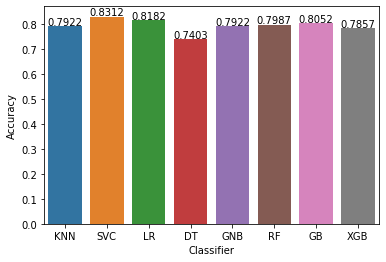

<Figure size 432x288 with 0 Axes>

In [31]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
plt.savefig('xx1.png')

### Replacing '0' values into mean value

In [37]:
diabetes[['glucose', 'bp', 'skin', 'insulin', 'bmi']] = diabetes[['glucose', 'bp', 'skin', 'insulin', 'bmi']].replace(0, np.NaN)
#diabetes.isnull().sum()
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [38]:
diabetes.fillna(diabetes.mean(), inplace=True)
#diabetes.isnull().sum()
diabetes.head()
#diabetes.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [39]:
feature_names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = diabetes[feature_names]
y = diabetes.outcome

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
print(X_train)

[[0.41176471 0.68831169 0.55102041 ... 0.34764826 0.26216909 0.55      ]
 [0.23529412 0.34415584 0.36734694 ... 0.20449898 0.1558497  0.01666667]
 [0.         0.78571429 0.67346939 ... 0.69734151 0.14901793 0.03333333]
 ...
 [0.23529412 0.32467532 0.41836735 ... 0.13292434 0.02988898 0.        ]
 [0.64705882 0.26623377 0.51020408 ... 0.24335378 0.09479078 0.23333333]
 [0.29411765 0.5974026  0.59183673 ... 0.29156367 0.23996584 0.8       ]]


In [42]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
#models.append(('ADB', AdaBoostClassifier(n_estimators=20,learning_rate=1,random_state=0)))
models.append(('GB', GradientBoostingClassifier(n_estimators=50, learning_rate=.1, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.7,objective='binary:logistic',n_estimators=20,max_depth=4,gamma=0)))
#models.append(('XGB',  XGBClassifier(objective='binary:logistic', gamma= 4, learning_rate=  0.15, max_depth= 1,n_estimators=60 ,subsample= 0.1)))
#'gamma': 4, 'learning_rate': 0.15000000000000002, 'max_depth': 1, 'n_estimators': 60, 'objective': 'binary:logistic', 'subsample': 0.1
#models.append(('XGB',  XGBClassifier(learning_rate=0.1,objective='binary:logistic',alpha= 0,colsample_bytree= 0.9, eta= 0.17500000000000002, gamma= 0.8500000000000001,reg_lambda= 1.9000000000000001, max_depth= 4, min_child_weight=2.0, n_estimators= 587, subsample= 0.8500000000000001)))

In [43]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
#tr_split.to_csv('after cleaning.csv')

  Name     Score
0  KNN  0.824675
1  SVC  0.805195
2   LR  0.805195
3   DT  0.759740
4  GNB  0.785714
5   RF  0.785714
6   GB  0.824675
7  XGB  0.831169


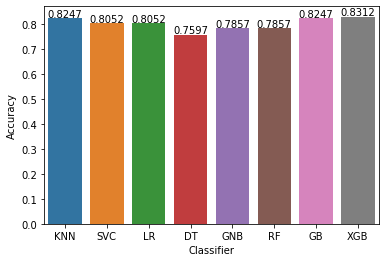

In [44]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
names = []
MSE = []
RMSE=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_dt = mean_squared_error(y_test,y_pred)
    rmse_dt =sqrt(mse_dt)
    MSE.append(mse_dt)
    RMSE.append(rmse_dt)
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'MSE': MSE, 'RMSE': RMSE})
#print(tr_split)
tr_split.to_csv('error.csv')

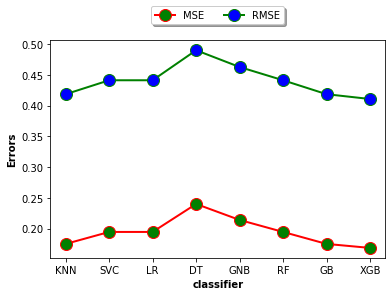

<Figure size 432x288 with 0 Axes>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=pd.read_csv('error.csv')
#barWidth = 0.3

#r1 = np.arange(len(MSE))
#r2 = [x + barWidth for x in r1]
 
plt.plot(x.Name,x.MSE, marker='o', markerfacecolor='green', markersize=12, color='red', linewidth=2,label='MSE')
plt.plot(x.Name,x.RMSE, marker='o', markerfacecolor='blue', markersize=12, color='green', linewidth=2,label='RMSE')
# Make the plot
#plt.bar(r1, MSE, color='blue', width=barWidth, edgecolor='white', label='MSE')
#plt.bar(r2, RMSE, color='red', width=barWidth, edgecolor='white', label='RMSE')

plt.xlabel('classifier', fontweight='bold')
plt.ylabel('Errors', fontweight='bold')
plt.xticks( ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 #[r + barWidth for r in range(len(MSE))],
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()
plt.savefig('xx.png')

In [47]:
from math import sqrt
mse_dt =mean_squared_error(y_test,y_pred)
print(mse_dt)
print(sqrt(mse_dt))

0.16883116883116883
0.4108907018066591


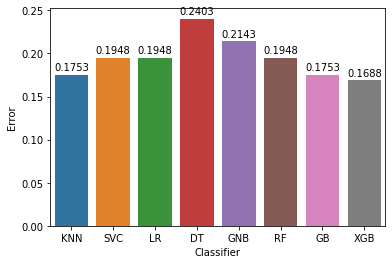

In [48]:
axis = sns.barplot(x = 'Name', y = 'MSE', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Error')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### Applying PCA without scaling through standazation(Z score normalization)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [50]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))

In [51]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)



  Name     Score
0  KNN  0.759740
1  SVC  0.694805
2   LR  0.779221
3   DT  0.772727
4  GNB  0.779221
5   RF  0.720779
6   GB  0.759740
7  XGB  0.733766


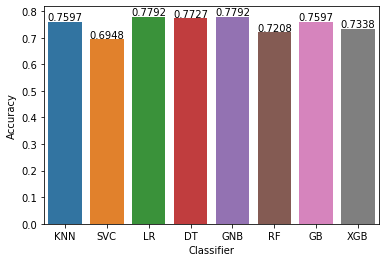

In [52]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### PCA with Feature Scaling through standazation(Z score normalization)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [54]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))

names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
tr_split.to_csv('PCAreasult.csv')

  Name     Score
0  KNN  0.811688
1  SVC  0.785714
2   LR  0.766234
3   DT  0.753247
4  GNB  0.740260
5   RF  0.740260
6   GB  0.759740
7  XGB  0.779221


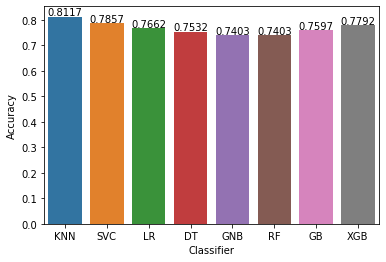

In [55]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### parameter tuning

In [56]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB',  XGBClassifier()))

In [57]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
#print(tr_split)
tr_split.to_csv('withoutparameter.csv')


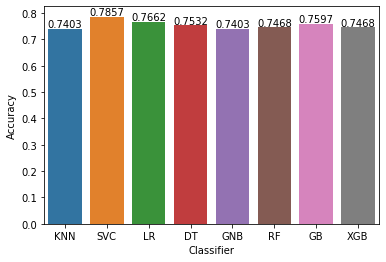

In [58]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [59]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('DT', DecisionTreeClassifier(criterion='gini',max_depth=3)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=50)))
models.append(('GB', GradientBoostingClassifier(n_estimators=50, learning_rate=.1, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))


In [60]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.740260
1  SVC  0.785714
2   LR  0.766234
3   DT  0.740260
4  GNB  0.740260
5   RF  0.766234
6   GB  0.759740
7  XGB  0.779221


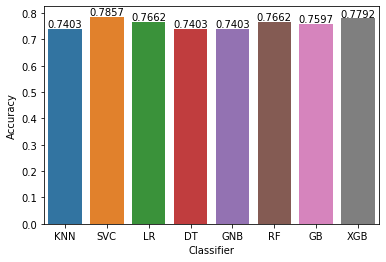

In [61]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
#models.append(('SVC', SVC(probability=True)))
models.append(('SVC', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = .8,objective='binary:logistic',n_estimators=100,max_depth=5,gamma=1)))

In [63]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.818182
1  SVC  0.772727
2   LR  0.811688
3   DT  0.753247
4  GNB  0.785714
5   RF  0.818182
6   GB  0.785714
7  XGB  0.805195


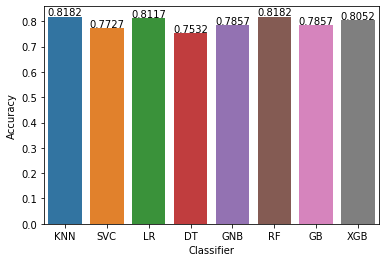

In [64]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [66]:
'''import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK

### Step 1 : defining the objective function
def objective(params, n_folds=3):

# Converting pandas dataframe into xgboost format
    d_train = xgb.DMatrix(X,y)    

# Running cross validation on your xgboost model
    cv_results = xgb.cv(params, d_train, nfold = n_folds, num_boost_round = 500, 
                        early_stopping_rounds = 25, metrics = 'rmse', seed = 0)
  
# returns the loss on validation set
    loss = min(cv_results['test-rmse-mean'])
    return loss


### step 2 : defining the search space
random_state=0
xgb_space = {
        'n_estimators': hp.hp.quniform('n_estimators', 200, 600, 1),
        'eta': hp.hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  hp.hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.hp.quniform('lambda', 1, 2, 0.1),
        'nthread': cores,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'seed': random_state
}
bayes_trials = Trials()
MAX_EVALS = 20

# Optimize
best = fmin(fn = objective, space = xgb_space, algo = hp.tpe.suggest,max_evals = MAX_EVALS, trials = bayes_trials)

### best will the return the the best hyperparameter set

print(best)'''

"import hyperopt as hp\nfrom hyperopt import Trials,fmin,STATUS_OK\n\n### Step 1 : defining the objective function\ndef objective(params, n_folds=3):\n\n# Converting pandas dataframe into xgboost format\n    d_train = xgb.DMatrix(X,y)    \n\n# Running cross validation on your xgboost model\n    cv_results = xgb.cv(params, d_train, nfold = n_folds, num_boost_round = 500, \n                        early_stopping_rounds = 25, metrics = 'rmse', seed = 0)\n  \n# returns the loss on validation set\n    loss = min(cv_results['test-rmse-mean'])\n    return loss\n\n\n### step 2 : defining the search space\nrandom_state=0\nxgb_space = {\n        'n_estimators': hp.hp.quniform('n_estimators', 200, 600, 1),\n        'eta': hp.hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.\n        'max_depth':  hp.hp.choice('max_depth', np.arange(1, 14, dtype=int)),\n        'min_child_weight': hp.hp.quniform('min_child_weight', 1, 10,

KNN


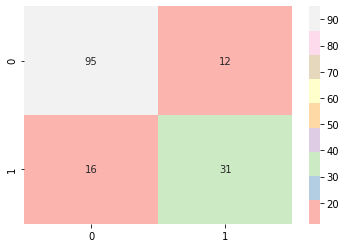

SVC


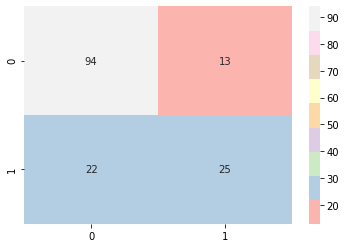

LR


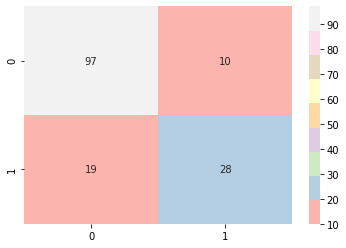

DT


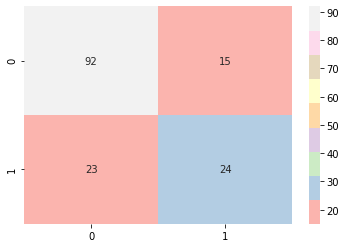

GNB


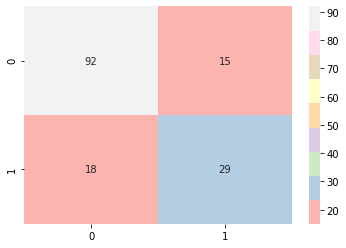

RF


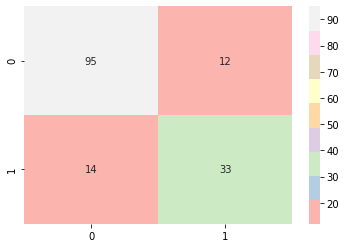

GB


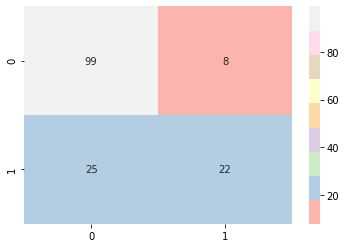

XGB


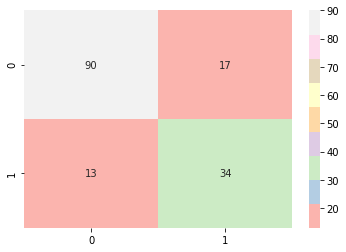

In [67]:
import seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    seaborn.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Pastel1')
    print(name)
    plt.show()


In [68]:
from sklearn import metrics
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(model.predict(X_train),y_train,drop_intermediate=False)
names = []
AUC_score = []
precision=[]
Recall=[]
Accuracy=[]
F1_score=[]
Matthews_corrcoef=[]
specificity=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    Accuracy.append(accuracy_score(y_test, y_pred))
    Recall.append(metrics.recall_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    AUC_score.append(roc_auc_score(y_test, y_pred))
    F1_score.append(f1_score(y_test,y_pred))
    Matthews_corrcoef.append(matthews_corrcoef(y_test,y_pred))
    specificity.append(TN / (TN + FP))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'precision': precision,'Sensitivity':Recall,'F1 score':F1_score,'AUC score':AUC_score,'Accuracy':Accuracy,'Matthews corrcoef':Matthews_corrcoef,'specificity':specificity})
#print(tr_split)
tr_split.to_csv('result1.csv')


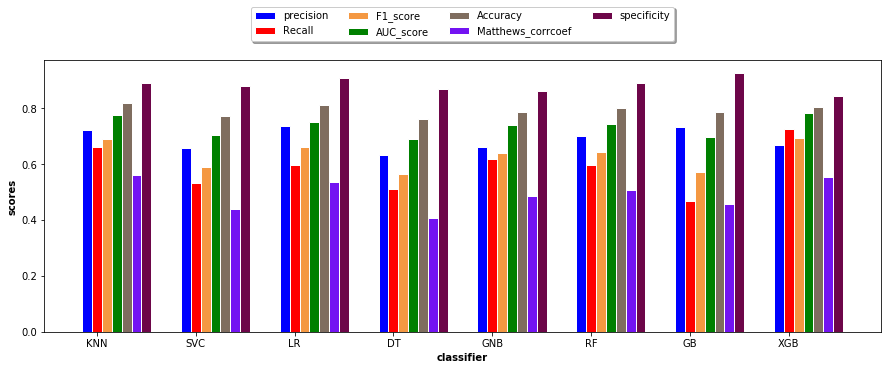

In [69]:
barWidth = 0.1

r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 
# Make the plot
plt.subplots(figsize=(15,5))
plt.bar(r1, precision, color='blue', width=barWidth, edgecolor='white', label='precision')
plt.bar(r2, Recall, color='red', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, F1_score, color='#f49842', width=barWidth, edgecolor='white', label='F1_score')
plt.bar(r4, AUC_score, color='green', width=barWidth, edgecolor='white', label='AUC_score')
plt.bar(r5, Accuracy, color='#7f6d5f', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r6, Matthews_corrcoef, color='#7313f2', width=barWidth, edgecolor='white', label='Matthews_corrcoef')
plt.bar(r7, specificity, color='#6d0649', width=barWidth, edgecolor='white', label='specificity')
# Add xticks on the middle of the group bars
plt.xlabel('classifier', fontweight='bold')
plt.ylabel('scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()

In [76]:
from sklearn import metrics
names = []
TP=[]
TN=[]
FP=[]
FN=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP.append(confusion[1, 1])
    TN.append(confusion[0, 0])
    FP.append(confusion[0, 1])
    FN.append(confusion[1, 0])
    
    names.append(name)

tr_split = pd.DataFrame({'Name': names,'TP': TP,'TN': TN,'FP': FP,'FN': FN})
print(tr_split)
#tr_split.to_csv('confusionmatrix1.csv')

  Name  TP  TN  FP  FN
0  KNN  31  95  12  16
1  SVC  25  94  13  22
2   LR  28  97  10  19
3   DT  24  93  14  23
4  GNB  29  92  15  18
5   RF  33  93  14  14
6   GB  22  99   8  25
7  XGB  34  90  17  13


In [78]:
for i in names:
    print((TP[i] + TN[i]) / float(TP[i] + TN[i] + FP[i] + FN[i]))

TypeError: list indices must be integers or slices, not str

In [79]:
#from sklearn import metrics
#confusion = metrics.confusion_matrix(y_test, y_pred)
#print(confusion)
#[row, column]
speficity=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    #print(name)
    speficity.append(TN / (TN + FP))
tr_split = pd.DataFrame({'Name': names,'speficity': speficity})
print(tr_split)

  Name  speficity
0  KNN   0.887850
1  SVC   0.878505
2   LR   0.906542
3   DT   0.869159
4  GNB   0.859813
5   RF   0.859813
6   GB   0.925234
7  XGB   0.841121


In [80]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8051948051948052
0.8051948051948052


### Classification Error:"Misclassification Rate"

In [81]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.19480519480519481
0.19480519480519476


### Sensitivity:TP / TP + FN

In [82]:
#sensitivity = TP / float(FN + TP)

#print(sensitivity)
from sklearn.metrics import specificity
print(metrics.recall_score(y_test, y_pred))
print(metrics.specificity(y_test, y_pred))

ImportError: cannot import name 'specificity' from 'sklearn.metrics' (C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

### Specificity: TN / (TN + FP)

In [83]:
specificity = TN / (TN + FP)

print(specificity)

0.8411214953271028


### False Positive Rate:

In [84]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1588785046728972
0.15887850467289721


### Precision:

In [85]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.6666666666666666
0.6666666666666666


In [86]:
model.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [87]:
model.predict_proba(X_test)[0:10]

array([[0.08090717, 0.91909283],
       [0.8827134 , 0.11728664],
       [0.97221917, 0.02778083],
       [0.13853896, 0.86146104],
       [0.9642059 , 0.03579406],
       [0.98770565, 0.01229438],
       [0.13268644, 0.86731356],
       [0.02923495, 0.97076505],
       [0.8484906 , 0.15150939],
       [0.583869  , 0.416131  ]], dtype=float32)

In [88]:
model.predict_proba(X_test)[0:10, 1]

array([0.91909283, 0.11728664, 0.02778083, 0.86146104, 0.03579406,
       0.01229438, 0.86731356, 0.97076505, 0.15150939, 0.416131  ],
      dtype=float32)

Text(0, 0.5, 'Frequency')

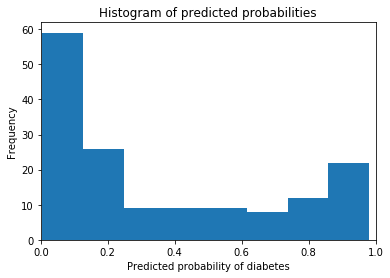

In [89]:

y_pred_prob = model.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

KNN


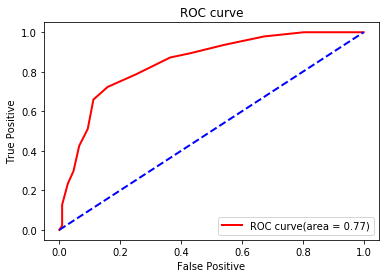

AttributeError: predict_proba is not available when  probability=False

In [90]:

for name,model in models:
    ##Adding the ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    print(name)
    plt.plot(fpr, tpr,lw=2,color='red',label='ROC curve(area = %0.2f)' %(auc))
    ##Random FPR and TPR
# Now, plot the computed values
    plt.plot([0, 1], [0, 1], lw=2,color='blue',linestyle='--')
    ##Title and label
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

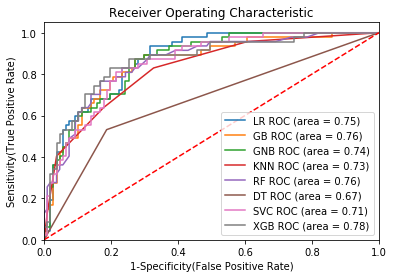

In [91]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import metrics
#import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'LR',
    'model': LogisticRegression(),
},
{
    'label': 'GB',
    'model': GradientBoostingClassifier(),
},    
{
    'label': 'GNB',
    'model': GaussianNB(),
}, 
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'RF',
    'model': RandomForestClassifier(),
},
{
    'label': 'DT',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'SVC',
    'model': SVC(probability=True),
},
{
    'label': 'XGB',
    'model':  XGBClassifier(),
},
]


# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ROC curve

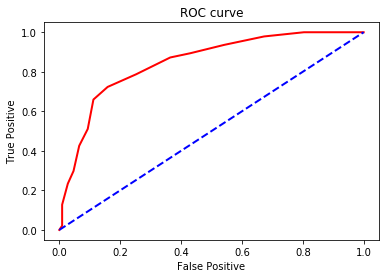

In [92]:

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.show()

In [93]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7762974746470471


##### Using K-Fold cross validation


In [101]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=1)

C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### RFECV

In [102]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy')
rfecv.fit(X_train, y_train)

TypeError: estimator should be an estimator implementing 'fit' method, 'model' was passed

In [96]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['glucose', 'bmi', 'age']


In [97]:
# Calculate accuracy scores 
X_new = diabetes[new_features]
initial_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7564422419685577 
Accuracy after Feature Selection : 0.7577751196172249 


In [100]:
names = []
initial_score = []
fe_score=[]
for name,model in models:
    results =model_selection.cross_val_score(model, X, y, cv=kfold)
    #results=cross_val_score(model, X, y, cv=8) 
    initial_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    fe_score = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy').mean()
    #initial_score.append(cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean())
    #fe_score.append(cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy').mean())
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'initial_score': initial_score,'fe_score':fe_score})
print(tr_split)
tr_split.to_csv('RFECV.csv')

TypeError: estimator should be an estimator implementing 'fit' method, 'model' was passed

In [ ]:
barWidth = 0.25

r1 = np.arange(len(initial_score))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, initial_score, color='green', width=barWidth, edgecolor='white', label='initial_score')
plt.bar(r2, fe_score, color='red', width=barWidth, edgecolor='white', label='fe_score')

# Add xticks on the middle of the group bars
plt.xlabel('classifier', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(initial_score))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=2,fancybox=True,shadow=True)
plt.show()


In [ ]:
"""axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()"""

### Deep learning

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
# fix random seed for reproducibility
np.random.seed(7)
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, init='uniform',activation='relu'))
model.add(Dense(64, init='uniform', activation='relu')) # 100 neurons with tanh activation function
model.add(Dense(12, init='uniform',activation='relu'))
model.add(Dense(16, init='uniform',activation='relu'))
model.add(Dense(1, init='uniform',activation='sigmoid'))
# Compile model

#sgd = optimizers.SGD(lr=0.01, nesterov=True)
#adam=optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer=sgd)
# Fit the model

x=model.fit(X_train, y_train, epochs=1000, batch_size=10,validation_data=(X_test, y_test))
#y_pred = model.predict(X_test)
# evaluate the model
score = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=8, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.6424 - val_loss: 0.6767 - val_accuracy: 0.6771
Epoch 2/1000
576/576 [==============================] - 0s 282us/step - loss: 0.6767 - accuracy: 0.6424 - val_loss: 0.6651 - val_accuracy: 0.6771
Epoch 3/1000
576/576 [==============================] - 0s 276us/step - loss: 0.6711 - accuracy: 0.6424 - val_loss: 0.6528 - val_accuracy: 0.6771
Epoch 4/1000
576/576 [==============================] - 0s 274us/step - loss: 0.6660 - accuracy: 0.6424 - val_loss: 0.6500 - val_accuracy: 0.6771
Epoch 5/1000
576/576 [==============================] - 0s 259us/step - loss: 0.6619 - accuracy: 0.6424 - val_loss: 0.6449 - val_accuracy: 0.6771
Epoch 6/1000
576/576 [==============================] - 0s 264us/step - loss: 0.6544 - accuracy: 0.6424 - val_loss: 0.6335 - val_accuracy: 0.6771
Epoch 7/1000
576/576 [==============================] - 0s 281us/step - loss: 0.

Epoch 112/1000
576/576 [==============================] - 0s 283us/step - loss: 0.4573 - accuracy: 0.7778 - val_loss: 0.4592 - val_accuracy: 0.7604
Epoch 113/1000
576/576 [==============================] - 0s 271us/step - loss: 0.4636 - accuracy: 0.7795 - val_loss: 0.4973 - val_accuracy: 0.7552
Epoch 114/1000
576/576 [==============================] - 0s 270us/step - loss: 0.4681 - accuracy: 0.7795 - val_loss: 0.4620 - val_accuracy: 0.7812
Epoch 115/1000
576/576 [==============================] - 0s 271us/step - loss: 0.4525 - accuracy: 0.7934 - val_loss: 0.4728 - val_accuracy: 0.7812
Epoch 116/1000
576/576 [==============================] - 0s 285us/step - loss: 0.4588 - accuracy: 0.7951 - val_loss: 0.4565 - val_accuracy: 0.7604
Epoch 117/1000
576/576 [==============================] - 0s 276us/step - loss: 0.4593 - accuracy: 0.7795 - val_loss: 0.4656 - val_accuracy: 0.7760
Epoch 118/1000
576/576 [==============================] - 0s 274us/step - loss: 0.4510 - accuracy: 0.7830 - val_

576/576 [==============================] - 0s 272us/step - loss: 0.4277 - accuracy: 0.7969 - val_loss: 0.4642 - val_accuracy: 0.7708
Epoch 223/1000
576/576 [==============================] - 0s 264us/step - loss: 0.4286 - accuracy: 0.7986 - val_loss: 0.4564 - val_accuracy: 0.7812
Epoch 224/1000
576/576 [==============================] - 0s 278us/step - loss: 0.4202 - accuracy: 0.8056 - val_loss: 0.4646 - val_accuracy: 0.7604
Epoch 225/1000
576/576 [==============================] - 0s 278us/step - loss: 0.4234 - accuracy: 0.7899 - val_loss: 0.4686 - val_accuracy: 0.7604
Epoch 226/1000
576/576 [==============================] - 0s 267us/step - loss: 0.4220 - accuracy: 0.7899 - val_loss: 0.4851 - val_accuracy: 0.7708
Epoch 227/1000
576/576 [==============================] - 0s 279us/step - loss: 0.4256 - accuracy: 0.8021 - val_loss: 0.4651 - val_accuracy: 0.7760
Epoch 228/1000
576/576 [==============================] - 0s 274us/step - loss: 0.4325 - accuracy: 0.7934 - val_loss: 0.4701 - 

576/576 [==============================] - 0s 264us/step - loss: 0.3942 - accuracy: 0.8160 - val_loss: 0.4811 - val_accuracy: 0.7396
Epoch 333/1000
576/576 [==============================] - 0s 276us/step - loss: 0.4156 - accuracy: 0.7986 - val_loss: 0.4693 - val_accuracy: 0.7708
Epoch 334/1000
576/576 [==============================] - 0s 272us/step - loss: 0.3961 - accuracy: 0.8177 - val_loss: 0.4693 - val_accuracy: 0.7604
Epoch 335/1000
576/576 [==============================] - 0s 267us/step - loss: 0.3896 - accuracy: 0.8212 - val_loss: 0.4491 - val_accuracy: 0.7604
Epoch 336/1000
576/576 [==============================] - 0s 278us/step - loss: 0.3920 - accuracy: 0.8090 - val_loss: 0.4541 - val_accuracy: 0.7604
Epoch 337/1000
576/576 [==============================] - 0s 261us/step - loss: 0.3904 - accuracy: 0.8160 - val_loss: 0.4434 - val_accuracy: 0.7656
Epoch 338/1000
576/576 [==============================] - 0s 283us/step - loss: 0.3831 - accuracy: 0.8194 - val_loss: 0.4649 - 

576/576 [==============================] - 0s 272us/step - loss: 0.3780 - accuracy: 0.8264 - val_loss: 0.4746 - val_accuracy: 0.7552
Epoch 443/1000
576/576 [==============================] - 0s 271us/step - loss: 0.4155 - accuracy: 0.8108 - val_loss: 0.5362 - val_accuracy: 0.7760
Epoch 444/1000
576/576 [==============================] - 0s 286us/step - loss: 0.3813 - accuracy: 0.8212 - val_loss: 0.4840 - val_accuracy: 0.7500
Epoch 445/1000
576/576 [==============================] - 0s 278us/step - loss: 0.3854 - accuracy: 0.8351 - val_loss: 0.4897 - val_accuracy: 0.7344
Epoch 446/1000
576/576 [==============================] - 0s 272us/step - loss: 0.3755 - accuracy: 0.8247 - val_loss: 0.5192 - val_accuracy: 0.7552
Epoch 447/1000
576/576 [==============================] - 0s 272us/step - loss: 0.3731 - accuracy: 0.8281 - val_loss: 0.5140 - val_accuracy: 0.7448
Epoch 448/1000
576/576 [==============================] - 0s 283us/step - loss: 0.3963 - accuracy: 0.8056 - val_loss: 0.4764 - 

576/576 [==============================] - 0s 269us/step - loss: 0.3717 - accuracy: 0.8264 - val_loss: 0.4824 - val_accuracy: 0.7656
Epoch 553/1000
576/576 [==============================] - 0s 265us/step - loss: 0.3644 - accuracy: 0.8247 - val_loss: 0.4830 - val_accuracy: 0.7760
Epoch 554/1000
576/576 [==============================] - 0s 276us/step - loss: 0.3482 - accuracy: 0.8438 - val_loss: 0.4744 - val_accuracy: 0.7604
Epoch 555/1000
576/576 [==============================] - 0s 256us/step - loss: 0.3634 - accuracy: 0.8455 - val_loss: 0.4821 - val_accuracy: 0.7552
Epoch 556/1000
576/576 [==============================] - 0s 264us/step - loss: 0.3504 - accuracy: 0.8368 - val_loss: 0.5067 - val_accuracy: 0.7604
Epoch 557/1000
576/576 [==============================] - 0s 278us/step - loss: 0.3617 - accuracy: 0.8385 - val_loss: 0.5023 - val_accuracy: 0.7552
Epoch 558/1000
576/576 [==============================] - 0s 260us/step - loss: 0.3684 - accuracy: 0.8299 - val_loss: 0.4897 - 

576/576 [==============================] - 0s 277us/step - loss: 0.3783 - accuracy: 0.8385 - val_loss: 0.5031 - val_accuracy: 0.7552
Epoch 663/1000
576/576 [==============================] - 0s 271us/step - loss: 0.3798 - accuracy: 0.8229 - val_loss: 0.4916 - val_accuracy: 0.7552
Epoch 664/1000
576/576 [==============================] - 0s 278us/step - loss: 0.3523 - accuracy: 0.8368 - val_loss: 0.5093 - val_accuracy: 0.7500
Epoch 665/1000
576/576 [==============================] - 0s 283us/step - loss: 0.3256 - accuracy: 0.8628 - val_loss: 0.4837 - val_accuracy: 0.7500
Epoch 666/1000
576/576 [==============================] - 0s 281us/step - loss: 0.3540 - accuracy: 0.8403 - val_loss: 0.4990 - val_accuracy: 0.7604
Epoch 667/1000
576/576 [==============================] - 0s 285us/step - loss: 0.3462 - accuracy: 0.8524 - val_loss: 0.5141 - val_accuracy: 0.7448
Epoch 668/1000
576/576 [==============================] - 0s 279us/step - loss: 0.3259 - accuracy: 0.8472 - val_loss: 0.5530 - 

576/576 [==============================] - 0s 264us/step - loss: 0.3218 - accuracy: 0.8559 - val_loss: 0.5464 - val_accuracy: 0.7396
Epoch 773/1000
576/576 [==============================] - 0s 278us/step - loss: 0.3421 - accuracy: 0.8403 - val_loss: 0.5272 - val_accuracy: 0.7344
Epoch 774/1000
576/576 [==============================] - 0s 261us/step - loss: 0.3278 - accuracy: 0.8507 - val_loss: 0.5516 - val_accuracy: 0.7552
Epoch 775/1000
576/576 [==============================] - 0s 267us/step - loss: 0.3161 - accuracy: 0.8524 - val_loss: 0.5599 - val_accuracy: 0.7604
Epoch 776/1000
576/576 [==============================] - 0s 284us/step - loss: 0.3197 - accuracy: 0.8472 - val_loss: 0.5531 - val_accuracy: 0.7708
Epoch 777/1000
576/576 [==============================] - 0s 281us/step - loss: 0.3152 - accuracy: 0.8576 - val_loss: 0.5507 - val_accuracy: 0.7552
Epoch 778/1000
576/576 [==============================] - 0s 276us/step - loss: 0.3185 - accuracy: 0.8507 - val_loss: 0.5808 - 

576/576 [==============================] - 0s 278us/step - loss: 0.3054 - accuracy: 0.8611 - val_loss: 0.5881 - val_accuracy: 0.7760
Epoch 883/1000
576/576 [==============================] - 0s 267us/step - loss: 0.3181 - accuracy: 0.8733 - val_loss: 0.5054 - val_accuracy: 0.7604
Epoch 884/1000
576/576 [==============================] - 0s 285us/step - loss: 0.3513 - accuracy: 0.8472 - val_loss: 0.4979 - val_accuracy: 0.7708
Epoch 885/1000
576/576 [==============================] - 0s 273us/step - loss: 0.3072 - accuracy: 0.8733 - val_loss: 0.5005 - val_accuracy: 0.7656
Epoch 886/1000
576/576 [==============================] - 0s 269us/step - loss: 0.3140 - accuracy: 0.8628 - val_loss: 0.5212 - val_accuracy: 0.7448
Epoch 887/1000
576/576 [==============================] - 0s 269us/step - loss: 0.3313 - accuracy: 0.8507 - val_loss: 0.5946 - val_accuracy: 0.7552
Epoch 888/1000
576/576 [==============================] - 0s 279us/step - loss: 0.3111 - accuracy: 0.8524 - val_loss: 0.5004 - 

576/576 [==============================] - 0s 285us/step - loss: 0.3413 - accuracy: 0.8438 - val_loss: 0.5189 - val_accuracy: 0.7552
Epoch 993/1000
576/576 [==============================] - 0s 279us/step - loss: 0.3066 - accuracy: 0.8681 - val_loss: 0.5393 - val_accuracy: 0.7552
Epoch 994/1000
576/576 [==============================] - 0s 272us/step - loss: 0.2901 - accuracy: 0.8698 - val_loss: 0.5742 - val_accuracy: 0.7240
Epoch 995/1000
576/576 [==============================] - 0s 272us/step - loss: 0.3001 - accuracy: 0.8524 - val_loss: 0.5199 - val_accuracy: 0.7500
Epoch 996/1000
576/576 [==============================] - 0s 274us/step - loss: 0.3202 - accuracy: 0.8681 - val_loss: 0.5287 - val_accuracy: 0.7448
Epoch 997/1000
576/576 [==============================] - 0s 286us/step - loss: 0.3032 - accuracy: 0.8663 - val_loss: 0.5927 - val_accuracy: 0.7500
Epoch 998/1000
576/576 [==============================] - 0s 298us/step - loss: 0.3037 - accuracy: 0.8542 - val_loss: 0.6014 - 

In [142]:
score = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print(x.history.keys())

576/576 [==============================] - 0s 35us/step

accuracy: 88.19%


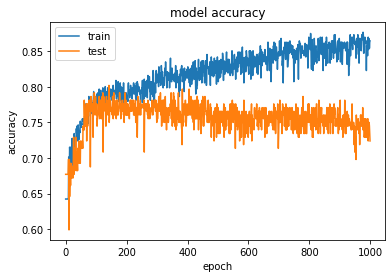

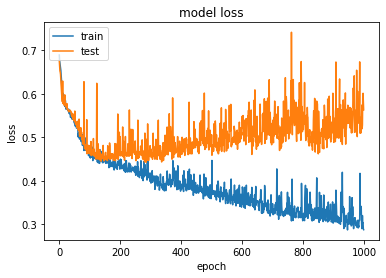

In [143]:
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
x=classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
576/576 [==============================] - 0s 553us/step - loss: 0.6963 - accuracy: 0.5156
Epoch 2/100
576/576 [==============================] - 0s 179us/step - loss: 0.6848 - accuracy: 0.6545
Epoch 3/100
576/576 [==============================] - 0s 203us/step - loss: 0.6801 - accuracy: 0.6493
Epoch 4/100
576/576 [==============================] - 0s 203us/step - loss: 0.6751 - accuracy: 0.6597
Epoch 5/100
576/576 [==============================] - 0s 208us/step - loss: 0.6688 - accuracy: 0.6562
Epoch 6/100
576/576 [==============================] - 0s 201us/step - loss: 0.6627 - accuracy: 0.6597
Epoch 7/100
576/576 [==============================] - 0s 170us/step - loss: 0.6537 - accuracy: 0.6753
Epoch 8/100
576/576 [==============================] - 0s 198us/step - loss: 0.6450 - accuracy: 0.6910
Epoch 9/100
576/576 [==============================] - 0s 194us/step - loss: 0.6329 - accuracy: 0.6979
Epoch 10/100
576/576 [==============================] - 0s 193us/step - l

dict_keys(['loss', 'accuracy'])


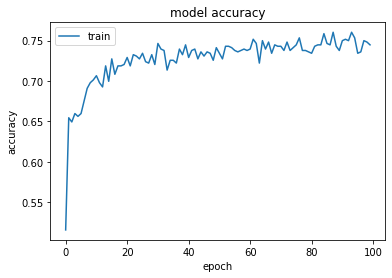

In [131]:
print(x.history.keys())
plt.plot(x.history['accuracy'])
#plt.plot(x.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
from keras.callbacks import ModelCheckpoint
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, init='uniform', activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Starting training...


C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
C:\Users\Amlan\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


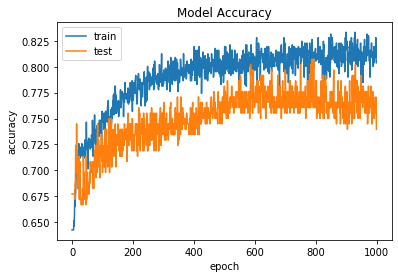

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

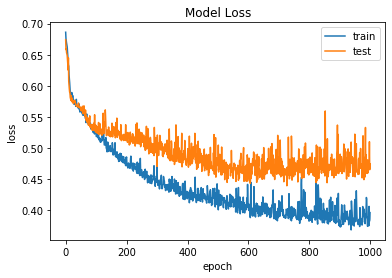

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [135]:
score = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)

576/576 [==============================] - 0s 28us/step

accuracy: 81.08%


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


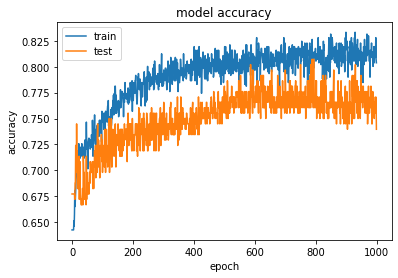

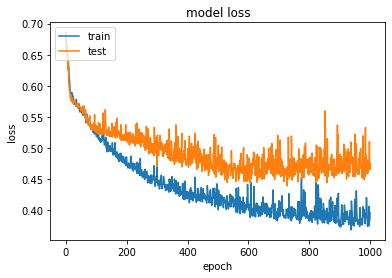

In [136]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
eval_model=classifier.evaluate(X_train, y_train)
#eval_model
y_pred=classifier.predict(X_test)
#y_pred =(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

576/576 [==============================] - 0s 189us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
#scores.append(score[1])
#names.append("Deep Learning")
#print(score[1])
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
#print(tr_split)
tr_split.to_csv('deepLearning.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=pd.read_csv('deepLearning.csv')
plt.subplots(figsize=(10,5))
plt.plot(x.Name,x.Score, marker='o', markerfacecolor='blue', markersize=12, color='red', linewidth=4,label='Accuracy')
plt.legend()

In [ ]:
plt.subplots(figsize=(10,5))
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [138]:
model = Sequential()
model.add(Dense(1000, input_dim=8, init='uniform', activation='relu')) # 1000 neurons
#model.add(Dense(100, init='uniform', activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, init='uniform', activation='relu')) # 500 neurons
model.add(Dense(1, init='uniform', activation='sigmoid')) # 1 output neuron
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, nb_epoch=1000, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1000, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/1000
 - 1s - loss: 1.1090 - accuracy: 0.6029
Epoch 2/1000
 - 1s - loss: 0.6533 - accuracy: 0.6667
Epoch 3/1000
 - 1s - loss: 0.6429 - accuracy: 0.6888
Epoch 4/1000
 - 1s - loss: 0.6028 - accuracy: 0.6862
Epoch 5/1000
 - 1s - loss: 0.5997 - accuracy: 0.6732
Epoch 6/1000
 - 1s - loss: 0.5904 - accuracy: 0.6901
Epoch 7/1000
 - 1s - loss: 0.5869 - accuracy: 0.7018
Epoch 8/1000
 - 1s - loss: 0.6037 - accuracy: 0.6706
Epoch 9/1000
 - 1s - loss: 0.5988 - accuracy: 0.6979
Epoch 10/1000
 - 1s - loss: 0.5727 - accuracy: 0.7031
Epoch 11/1000
 - 1s - loss: 0.5744 - accuracy: 0.7083
Epoch 12/1000
 - 1s - loss: 0.5798 - accuracy: 0.7044
Epoch 13/1000
 - 1s - loss: 0.5795 - accuracy: 0.7005
Epoch 14/1000
 - 1s - loss: 0.5759 - accuracy: 0.7070
Epoch 15/1000
 - 1s - loss: 0.5584 - accuracy: 0.7214
Epoch 16/1000
 - 1s - loss: 0.5850 - accuracy: 0.7031
Epoch 17/1000
 - 1s - loss: 0.5656 - accuracy: 0.7135
Epoch 18/1000
 - 1s - loss: 0.5724 - accuracy: 0.7135
Epoch 19/1000
 - 1s - loss: 0.5865 - 

Epoch 152/1000
 - 1s - loss: 0.4241 - accuracy: 0.7943
Epoch 153/1000
 - 1s - loss: 0.4633 - accuracy: 0.7773
Epoch 154/1000
 - 1s - loss: 0.4524 - accuracy: 0.7826
Epoch 155/1000
 - 1s - loss: 0.4404 - accuracy: 0.7852
Epoch 156/1000
 - 1s - loss: 0.4335 - accuracy: 0.7786
Epoch 157/1000
 - 1s - loss: 0.4257 - accuracy: 0.7904
Epoch 158/1000
 - 1s - loss: 0.4244 - accuracy: 0.7878
Epoch 159/1000
 - 1s - loss: 0.4303 - accuracy: 0.7917
Epoch 160/1000
 - 1s - loss: 0.4371 - accuracy: 0.7995
Epoch 161/1000
 - 1s - loss: 0.4157 - accuracy: 0.8008
Epoch 162/1000
 - 1s - loss: 0.4249 - accuracy: 0.8034
Epoch 163/1000
 - 1s - loss: 0.4221 - accuracy: 0.8112
Epoch 164/1000
 - 1s - loss: 0.4105 - accuracy: 0.7982
Epoch 165/1000
 - 1s - loss: 0.4140 - accuracy: 0.7891
Epoch 166/1000
 - 1s - loss: 0.4192 - accuracy: 0.7865
Epoch 167/1000
 - 1s - loss: 0.4177 - accuracy: 0.7917
Epoch 168/1000
 - 1s - loss: 0.4189 - accuracy: 0.7891
Epoch 169/1000
 - 1s - loss: 0.4256 - accuracy: 0.7878
Epoch 170/

Epoch 301/1000
 - 1s - loss: 0.3643 - accuracy: 0.8138
Epoch 302/1000
 - 1s - loss: 0.3700 - accuracy: 0.7969
Epoch 303/1000
 - 1s - loss: 0.3776 - accuracy: 0.8112
Epoch 304/1000
 - 1s - loss: 0.3977 - accuracy: 0.8008
Epoch 305/1000
 - 1s - loss: 0.3950 - accuracy: 0.8138
Epoch 306/1000
 - 1s - loss: 0.3888 - accuracy: 0.7878
Epoch 307/1000
 - 1s - loss: 0.3877 - accuracy: 0.8047
Epoch 308/1000
 - 1s - loss: 0.3836 - accuracy: 0.8021
Epoch 309/1000
 - 1s - loss: 0.3849 - accuracy: 0.8060
Epoch 310/1000
 - 1s - loss: 0.3879 - accuracy: 0.8216
Epoch 311/1000
 - 1s - loss: 0.3995 - accuracy: 0.7943
Epoch 312/1000
 - 1s - loss: 0.3724 - accuracy: 0.8138
Epoch 313/1000
 - 1s - loss: 0.3844 - accuracy: 0.8047
Epoch 314/1000
 - 1s - loss: 0.3875 - accuracy: 0.8021
Epoch 315/1000
 - 1s - loss: 0.3922 - accuracy: 0.7956
Epoch 316/1000
 - 1s - loss: 0.3908 - accuracy: 0.8151
Epoch 317/1000
 - 1s - loss: 0.3914 - accuracy: 0.8086
Epoch 318/1000
 - 1s - loss: 0.3807 - accuracy: 0.8008
Epoch 319/

Epoch 450/1000
 - 1s - loss: 0.3568 - accuracy: 0.8177
Epoch 451/1000
 - 1s - loss: 0.3361 - accuracy: 0.8333
Epoch 452/1000
 - 1s - loss: 0.3405 - accuracy: 0.8477
Epoch 453/1000
 - 1s - loss: 0.3412 - accuracy: 0.8294
Epoch 454/1000
 - 1s - loss: 0.3464 - accuracy: 0.8320
Epoch 455/1000
 - 1s - loss: 0.3668 - accuracy: 0.8164
Epoch 456/1000
 - 1s - loss: 0.3584 - accuracy: 0.8203
Epoch 457/1000
 - 1s - loss: 0.3355 - accuracy: 0.8346
Epoch 458/1000
 - 1s - loss: 0.3642 - accuracy: 0.8138
Epoch 459/1000
 - 1s - loss: 0.3782 - accuracy: 0.8177
Epoch 460/1000
 - 1s - loss: 0.3518 - accuracy: 0.8151
Epoch 461/1000
 - 1s - loss: 0.3359 - accuracy: 0.8346
Epoch 462/1000
 - 1s - loss: 0.3479 - accuracy: 0.8294
Epoch 463/1000
 - 1s - loss: 0.3572 - accuracy: 0.8177
Epoch 464/1000
 - 1s - loss: 0.3552 - accuracy: 0.8255
Epoch 465/1000
 - 1s - loss: 0.3494 - accuracy: 0.8112
Epoch 466/1000
 - 1s - loss: 0.3592 - accuracy: 0.8320
Epoch 467/1000
 - 1s - loss: 0.3636 - accuracy: 0.8164
Epoch 468/

Epoch 599/1000
 - 1s - loss: 0.3403 - accuracy: 0.8359
Epoch 600/1000
 - 1s - loss: 0.3172 - accuracy: 0.8411
Epoch 601/1000
 - 1s - loss: 0.3164 - accuracy: 0.8464
Epoch 602/1000
 - 1s - loss: 0.3144 - accuracy: 0.8490
Epoch 603/1000
 - 1s - loss: 0.3173 - accuracy: 0.8542
Epoch 604/1000
 - 1s - loss: 0.3356 - accuracy: 0.8477
Epoch 605/1000
 - 1s - loss: 0.3216 - accuracy: 0.8438
Epoch 606/1000
 - 1s - loss: 0.3215 - accuracy: 0.8490
Epoch 607/1000
 - 1s - loss: 0.3428 - accuracy: 0.8307
Epoch 608/1000
 - 1s - loss: 0.3652 - accuracy: 0.8060
Epoch 609/1000
 - 1s - loss: 0.3750 - accuracy: 0.8177
Epoch 610/1000
 - 1s - loss: 0.3095 - accuracy: 0.8424
Epoch 611/1000
 - 1s - loss: 0.3172 - accuracy: 0.8516
Epoch 612/1000
 - 1s - loss: 0.3631 - accuracy: 0.8242
Epoch 613/1000
 - 1s - loss: 0.3278 - accuracy: 0.8477
Epoch 614/1000
 - 1s - loss: 0.3237 - accuracy: 0.8372
Epoch 615/1000
 - 1s - loss: 0.3123 - accuracy: 0.8542
Epoch 616/1000
 - 1s - loss: 0.3056 - accuracy: 0.8411
Epoch 617/

Epoch 748/1000
 - 1s - loss: 0.2782 - accuracy: 0.8594
Epoch 749/1000
 - 1s - loss: 0.3783 - accuracy: 0.8307
Epoch 750/1000
 - 1s - loss: 0.3200 - accuracy: 0.8477
Epoch 751/1000
 - 1s - loss: 0.2990 - accuracy: 0.8398
Epoch 752/1000
 - 1s - loss: 0.3107 - accuracy: 0.8490
Epoch 753/1000
 - 1s - loss: 0.2887 - accuracy: 0.8607
Epoch 754/1000
 - 1s - loss: 0.2893 - accuracy: 0.8451
Epoch 755/1000
 - 1s - loss: 0.3361 - accuracy: 0.8346
Epoch 756/1000
 - 1s - loss: 0.2961 - accuracy: 0.8555
Epoch 757/1000
 - 1s - loss: 0.3006 - accuracy: 0.8672
Epoch 758/1000
 - 1s - loss: 0.3193 - accuracy: 0.8464
Epoch 759/1000
 - 1s - loss: 0.2909 - accuracy: 0.8607
Epoch 760/1000
 - 1s - loss: 0.3105 - accuracy: 0.8372
Epoch 761/1000
 - 1s - loss: 0.3028 - accuracy: 0.8568
Epoch 762/1000
 - 1s - loss: 0.2920 - accuracy: 0.8607
Epoch 763/1000
 - 1s - loss: 0.3100 - accuracy: 0.8477
Epoch 764/1000
 - 1s - loss: 0.2751 - accuracy: 0.8672
Epoch 765/1000
 - 1s - loss: 0.3076 - accuracy: 0.8464
Epoch 766/

Epoch 897/1000
 - 1s - loss: 0.3276 - accuracy: 0.8542
Epoch 898/1000
 - 1s - loss: 0.2802 - accuracy: 0.8659
Epoch 899/1000
 - 1s - loss: 0.2809 - accuracy: 0.8737
Epoch 900/1000
 - 1s - loss: 0.2841 - accuracy: 0.8555
Epoch 901/1000
 - 1s - loss: 0.2831 - accuracy: 0.8555
Epoch 902/1000
 - 1s - loss: 0.2794 - accuracy: 0.8672
Epoch 903/1000
 - 1s - loss: 0.2796 - accuracy: 0.8724
Epoch 904/1000
 - 1s - loss: 0.2893 - accuracy: 0.8594
Epoch 905/1000
 - 1s - loss: 0.3339 - accuracy: 0.8424
Epoch 906/1000
 - 1s - loss: 0.2744 - accuracy: 0.8672
Epoch 907/1000
 - 1s - loss: 0.2804 - accuracy: 0.8633
Epoch 908/1000
 - 1s - loss: 0.2931 - accuracy: 0.8490
Epoch 909/1000
 - 1s - loss: 0.2811 - accuracy: 0.8646
Epoch 910/1000
 - 1s - loss: 0.2732 - accuracy: 0.8698
Epoch 911/1000
 - 1s - loss: 0.2736 - accuracy: 0.8659
Epoch 912/1000
 - 1s - loss: 0.2697 - accuracy: 0.8685
Epoch 913/1000
 - 1s - loss: 0.2973 - accuracy: 0.8581
Epoch 914/1000
 - 1s - loss: 0.2836 - accuracy: 0.8659
Epoch 915/

In [ ]:
XGB=XGBClassifier()
XGB

In [ ]:
from sklearn.model_selection import GridSearchCV

XGB_params = { 
    'n_estimators': np.arange(10,100,10),
    'max_depth':np.arange(1,5,1),
    #'eta':np.arange(0.025, 0.25, 0.025),
    'subsample':np.arange(0.1, 1, 0.5),
    'gamma':np.arange(0,10,1),
    'learning_rate':np.arange(0.0,0.2,0.05),
    'objective': ['binary:logistic']
    #'random_state': [0]
}

XGB_random = GridSearchCV(estimator=XGB, param_grid=XGB_params, cv= 5)
XGB_random.fit(X, y)
print (XGB_random.best_params_)

In [ ]:
import numpy as np
#import skdata.iris.view
import hyperopt.tpe
import hpsklearn
import hpsklearn.demo_support
import time


In [ ]:
estimator = hpsklearn.HyperoptEstimator(
    preprocessing=hpsklearn.components.any_preprocessing('pp'),
    classifier=hpsklearn.components.any_classifier('clf'),
    algo=hyperopt.tpe.suggest,
    trial_timeout=15.0, # seconds
    max_evals=15,
    )

In [ ]:
fit_iterator = estimator.fit_iter(X_train,y_train)
fit_iterator.__next__()
plot_helper = hpsklearn.demo_support.PlotHelper(estimator,mintodate_ylim=(-.01, .05))
while len(estimator.trials.trials) < estimator.max_evals:
    fit_iterator.send(1) # -- try one more model
    plot_helper.post_iter()
plot_helper.post_loop()

In [ ]:
from hyperopt import estimator
print ('Best preprocessing pipeline:')
for pp in estimator._best_preprocs:
    print (pp)
print
print ('Best classifier:\n', estimator._best_learner)
test_predictions = estimator.predict(X_test)
acc_in_percent = 100 * np.mean(test_predictions == y_test)
print
print ('Prediction accuracy in generalization is %.1f%%' % acc_in_percent)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target
X = diabetes[feature_names]
y = diabetes.outcome

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (KNeighborsClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=15)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves ( LogisticRegression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(solver='lbfgs', max_iter=4000)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (DecisionTreeClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy',max_depth=4)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (RandomForestClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (GradientBoostingClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(n_estimators=50, learning_rate=.1, random_state=0)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves ( XGBClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = XGBClassifier(learning_rate=0.1,subsample = 0.7,objective='binary:logistic',n_estimators=20,max_depth=4,gamma=0)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
from keras import callbacks
from keras.layers import Dropout
tb = callbacks.TensorBoard(log_dir='/.logs', histogram_freq=10, batch_size=32,
                           write_graph=True, write_grads=True, write_images=False,
                           embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

 # create model - almost the same code
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='first_input'))
model.add(Dense(500, activation='relu', name='first_hidden'))
model.add(Dropout(0.5, name='dropout_1'))
model.add(Dense(8, activation='relu', name='second_hidden'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.33, epochs=1000, batch_size=10, callbacks=[tb, early_stop])


In [122]:
from keras import callbacks
from keras.layers import Dropout

tb = callbacks.TensorBoard(log_dir='/.logs', histogram_freq=10, batch_size=32,
                           write_graph=True, write_grads=True, write_images=False,
                           embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
#X = dataset[:, 0:8]
#Y = dataset[:, 8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu', name='first_input'))
model.add(Dense(500, activation='tanh', name='first_hidden'))
model.add(Dropout(0.5, name='dropout_1'))
model.add(Dense(8, activation='relu', name='second_hidden'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
#x=model.fit(X_train, y_train, epochs=iterations, batch_size=10,validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, validation_split=0.33, epochs=1000, batch_size=10, callbacks=[tb,early_stop])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'EarlyStopping' is not defined

In [108]:
y_pred = model.predict_classes(X_test)
print(evaluate(y_test, y_pred))

NameError: name 'evaluate' is not defined

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

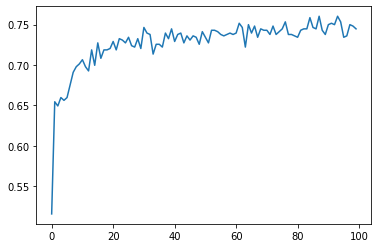

In [140]:
print(x.history.keys())
# summarize history for accuracy
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


In [ ]:
score = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

In [ ]:
model1 = Sequential()
model1.add(Dense(16, input_shape=(8,), init='uniform', activation='relu'))
model1.add(Dense(1, init='uniform', activation='sigmoid'))

In [ ]:
from keras.utils.visualize_util import plot
plot(model1, to_file='model1.png', show_shapes=True)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from keras import models, layers, losses, optimizers, metrics
from keras.models import Sequential
from keras import optimizers
import keras
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()

# Hyperparameters
hold_prob = 0.0
beta = 1e-6
alpha = 0.05
lr_decay = 0.01
iterations = 300
validation_split = 0.5
opt_momentum = 0.8 # (Use only for SGD)

# Optimizer
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

#model.add(layers.Dense(units=12, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
#model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='sigmoid'))

# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train
#model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split)
#x=model.fit(X_train, y_train, epochs=iterations, batch_size=10,validation_split=validation_split)
x=model.fit(X_train, y_train, epochs=iterations, batch_size=10,validation_data=(X_test, y_test))

In [123]:
#fmon = FitMonitor()# optional
from keras.callbacks import ModelCheckpoint
# specify filepath- this will write a new file for each epoch with the epoch number contained within the filename
filepath="nn_weights-{epoch:02d}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', 
                                             save_weights_only=False, save_best_only=False, mode='max')

xModel=model.fit(X_train, y_train, epochs=100,verbose=0,batch_size=10,validation_data=(X_test, y_test),callbacks=[checkpoint],initial_epoch=0)

NameError: name 'keras' is not defined

In [124]:
print(xModel.history.keys())
# summarize history for accuracy


NameError: name 'xModel' is not defined

In [ ]:
plt.plot(x.history['acc'])
plt.plot(x.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()